In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,40538,None,None,85789.773811
2020-06-13,40539,None,None,79704.438639
2020-06-14,40540,None,None,74059.380846
2020-06-15,40541,None,None,68742.247146
2020-06-16,40542,None,None,64007.889840
...,...,...,...,...
2021-03-18,40817,None,None,80224.290359
2021-03-19,40818,None,None,78096.919967
2021-03-20,40819,None,None,76626.059419


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-22_2021-03-22-17-03.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-21_2021-03-21-17-45.pickle


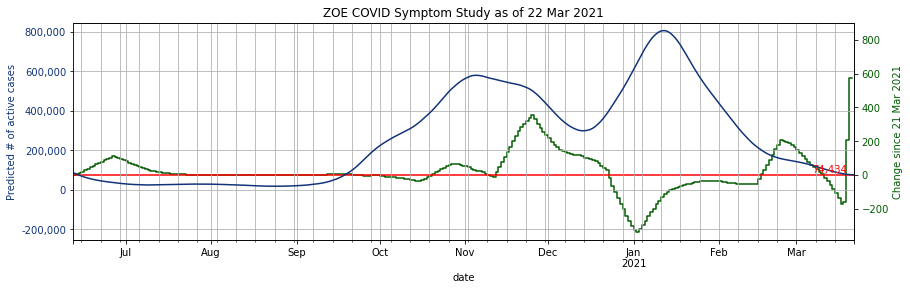

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

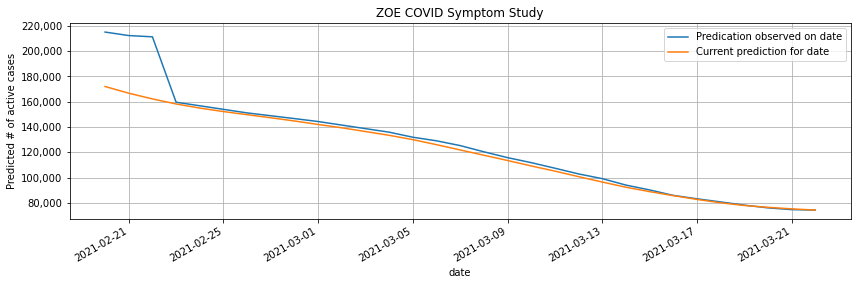

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-22_2021-03-22-17-03.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
15,"Kingston upon Hull, City of",E06000010,1.298699
325,Glasgow City,S12000046,0.728066
306,Midlothian,S12000019,0.642890
328,Conwy,W06000003,0.632763
46,Northumberland,E06000057,0.545368
326,Isle of Anglesey,W06000001,0.542775
103,Erewash,E07000036,0.502305
358,Belfast,N09000003,0.491269
7,Halton,E06000006,0.477141
370,Redbridge,E09000026,0.463753
